In [12]:
## Importing Modules

from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError as rmse




In [4]:
## Authenticate & Create Dataframe using Data in Sheets

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
sheet = gc.open('deep_L_EXP-01').sheet1
rows = sheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'INPUT':'int'})
df = df.astype({'OUTPUT':'int'})
df.head(21)


,INPUT,OUTPUT
0,1,5
1,2,9
2,3,13
3,4,17
4,5,21
5,6,25
6,7,29
7,8,33
8,9,37
9,10,41


In [9]:
## Assign X and Y values

X = df[["INPUT"]] .values
y = df[["OUTPUT"]].values

print(x)
print(y)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]]
[[  5]
 [  9]
 [ 13]
 [ 17]
 [ 21]
 [ 25]
 [ 29]
 [ 33]
 [ 37]
 [ 41]
 [ 45]
 [ 49]
 [ 53]
 [ 57]
 [ 61]
 [ 65]
 [ 69]
 [ 73]
 [ 77]
 [ 81]
 [ 85]
 [ 89]
 [ 93]
 [ 97]
 [101]
 [105]
 [109]
 [113]
 [117]
 [121]]


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)


In [13]:
AI_Brain = Sequential([
    Dense(units = 5, activation = 'relu', input_shape=[1]),
    Dense(units = 3, activation = 'relu'),
    Dense(units = 1)
])

AI_Brain.compile(optimizer= 'rmsprop', loss="mse")
AI_Brain.fit(X_train1,y_train,epochs=5000)
AI_Brain.summary()

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 12ms/step - loss: 347.4947
Epoch 2509/5000
1/1 [==============================] - 0s 30ms/step - loss: 347.0610
Epoch 2510/5000
1/1 [==============================] - 0s 32ms/step - loss: 346.6287
Epoch 2511/5000
1/1 [==============================] - 0s 13ms/step - loss: 346.1980
Epoch 2512/5000
1/1 [==============================] - 0s 15ms/step - loss: 345.7688
Epoch 2513/5000
1/1 [==============================] - 0s 21ms/step - loss: 345.3412
Epoch 2514/5000
1/1 [==============================] - 0s 18ms/step - loss: 344.9152
Epoch 2515/5000
1/1 [==============================] - 0s 15ms/step - loss: 344.4906
Epoch 2516/5000
1/1 [==============================] - 0s 20ms/step - loss: 344.0677
Epoch 2517/5000
1/1 [==============================] - 0s 28ms/step - loss: 343.6463
Epoch 2518/5000
1/1 [==============================] - 0s 8ms/step - loss: 343.2265
Epoch 2519/5000
1/1 [==========

<Axes: >

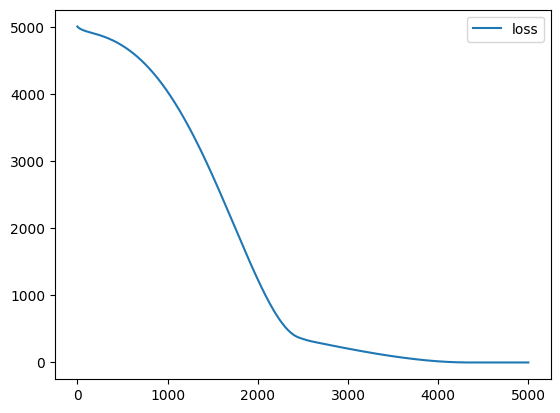

In [14]:
loss_df = pd.DataFrame(AI_Brain.history.history)
loss_df.plot()

In [15]:
X_test1 = Scaler.transform(X_test)
AI_Brain.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 124ms/step - loss: 0.0019


0.0019397314172238111

In [16]:
X_n1 = [[20]]
X_n1_1 = Scaler.transform(X_n1)
AI_Brain.predict(X_n1_1)

1/1 [==============================] - 0s 81ms/step


array([[80.95455]], dtype=float32)